In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


In [7]:
# 1. Load Data
df = pd.read_csv('data_sensors.csv')
sensor_cols = [f'Sensor {i}' for i in range(20)]

# 2. Data Overview & Missing Values
print("--- Data Overview ---")
print(df.info())

--- Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sensor 0   1600 non-null   float64
 1   Sensor 1   1600 non-null   float64
 2   Sensor 2   1600 non-null   float64
 3   Sensor 3   1600 non-null   float64
 4   Sensor 4   1600 non-null   float64
 5   Sensor 5   1600 non-null   float64
 6   Sensor 6   1600 non-null   float64
 7   Sensor 7   1600 non-null   float64
 8   Sensor 8   1600 non-null   float64
 9   Sensor 9   1600 non-null   float64
 10  Sensor 10  1600 non-null   float64
 11  Sensor 11  1600 non-null   float64
 12  Sensor 12  1600 non-null   float64
 13  Sensor 13  1600 non-null   float64
 14  Sensor 14  1600 non-null   float64
 15  Sensor 15  1600 non-null   float64
 16  Sensor 16  1600 non-null   float64
 17  Sensor 17  1600 non-null   float64
 18  Sensor 18  1600 non-null   float64
 19  Sensor 19  1600 non-null  

In [28]:
print("\n--- Duplicate rows ---")
print(df.duplicated().sum())


--- Duplicate rows ---
0


In [27]:
n_total = len(df)
n_labeled = df["Label"].notna().sum()
print(f"\nTotal rows: {n_total:,} | Labeled: {n_labeled:,} ({n_labeled/n_total:.1%}) | Unlabeled: {n_total-n_labeled:,}")


Total rows: 1,600 | Labeled: 40 (2.5%) | Unlabeled: 1,560


In [25]:
# Checking specifically for missing data
missing = df[df.columns[:-1]].isnull().sum()
print("\n--- Missing Values Report ---")
if missing.any():
    print(missing[missing > 0])
else:
    print("No missing values found in the feature set.")


--- Missing Values Report ---
No missing values found in the feature set.


In [10]:
# 3. Descriptive Statistics
print("\n--- Descriptive Statistics (Sensors) ---")
# This helps identify scale, mean, and potential range issues
print(df[sensor_cols].describe())


--- Descriptive Statistics (Sensors) ---
          Sensor 0     Sensor 1     Sensor 2     Sensor 3     Sensor 4  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean     -0.003901     0.010692     0.003611     0.016913     0.006504   
std       0.578326     0.580784     0.359632     0.583571     0.570841   
min      -0.998098    -0.992518    -0.800000    -0.999775    -0.999870   
25%      -0.507756    -0.488596    -0.259969    -0.504151    -0.485490   
50%       0.004809     0.017735     0.000516     0.051528     0.000811   
75%       0.476584     0.513715     0.270990     0.512762     0.495880   
max       0.999610     0.999463     0.800000     0.999733     0.992920   

          Sensor 5     Sensor 6     Sensor 7     Sensor 8     Sensor 9  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean     -0.035332     0.002607    -0.023096     0.014207     0.001201   
std       0.593607     0.572523     0.588614     0.579928     0.60269

In [11]:
# 4. Outlier Detection (using the Interquartile Range - IQR method)
Q1 = df[sensor_cols].quantile(0.25)
Q3 = df[sensor_cols].quantile(0.75)
IQR = Q3 - Q1
# Identifying points outside 1.5 * IQR
outliers = ((df[sensor_cols] < (Q1 - 1.5 * IQR)) | (df[sensor_cols] > (Q3 + 1.5 * IQR))).sum()
print("\n--- Outlier Counts per Sensor ---")
print(outliers)


--- Outlier Counts per Sensor ---
Sensor 0     0
Sensor 1     0
Sensor 2     0
Sensor 3     0
Sensor 4     0
Sensor 5     0
Sensor 6     0
Sensor 7     0
Sensor 8     0
Sensor 9     0
Sensor 10    0
Sensor 11    0
Sensor 12    0
Sensor 13    0
Sensor 14    0
Sensor 15    0
Sensor 16    0
Sensor 17    0
Sensor 18    0
Sensor 19    0
dtype: int64


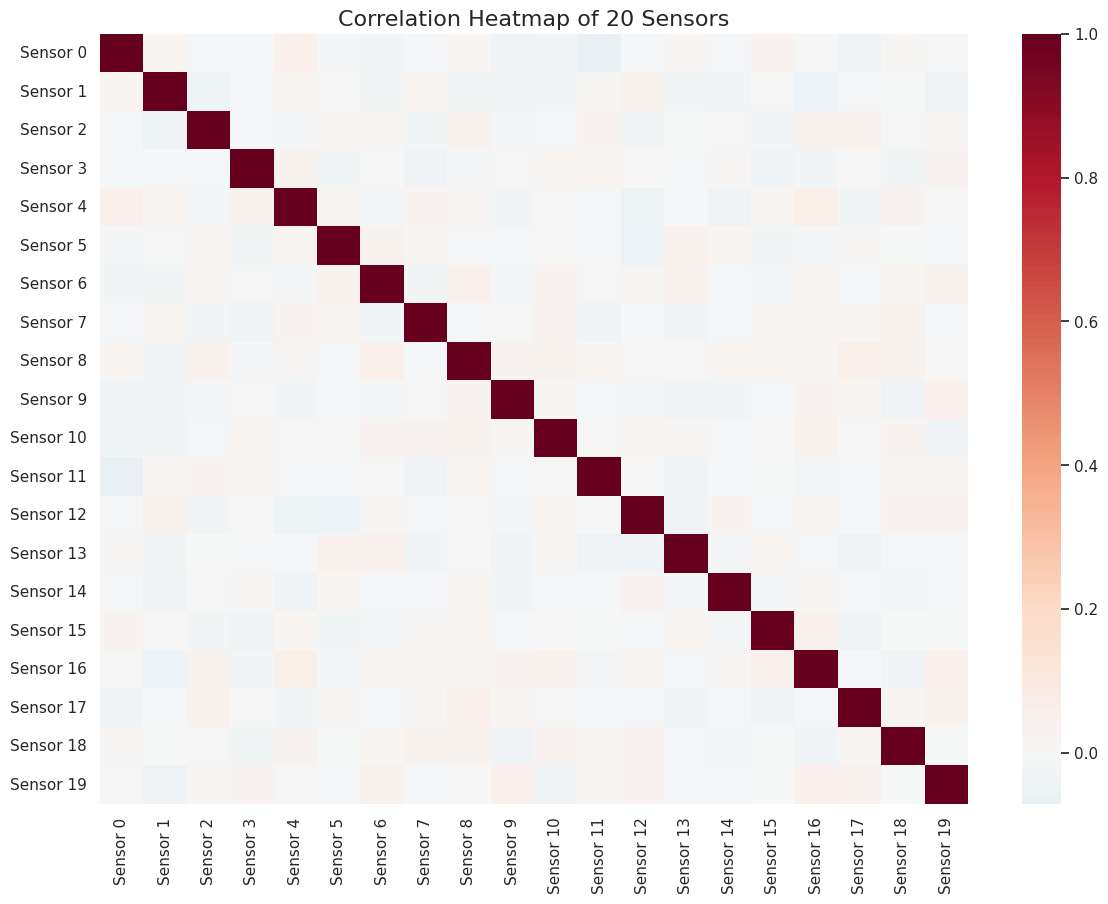

In [12]:

# A. Correlation Heatmap
# To see if sensors are redundant or have strong relationships
plt.figure(figsize=(14, 10))
corr = df[sensor_cols].corr()
sns.heatmap(corr, annot=False, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap of 20 Sensors', fontsize=16)
plt.savefig('eda_correlation_heatmap.png')

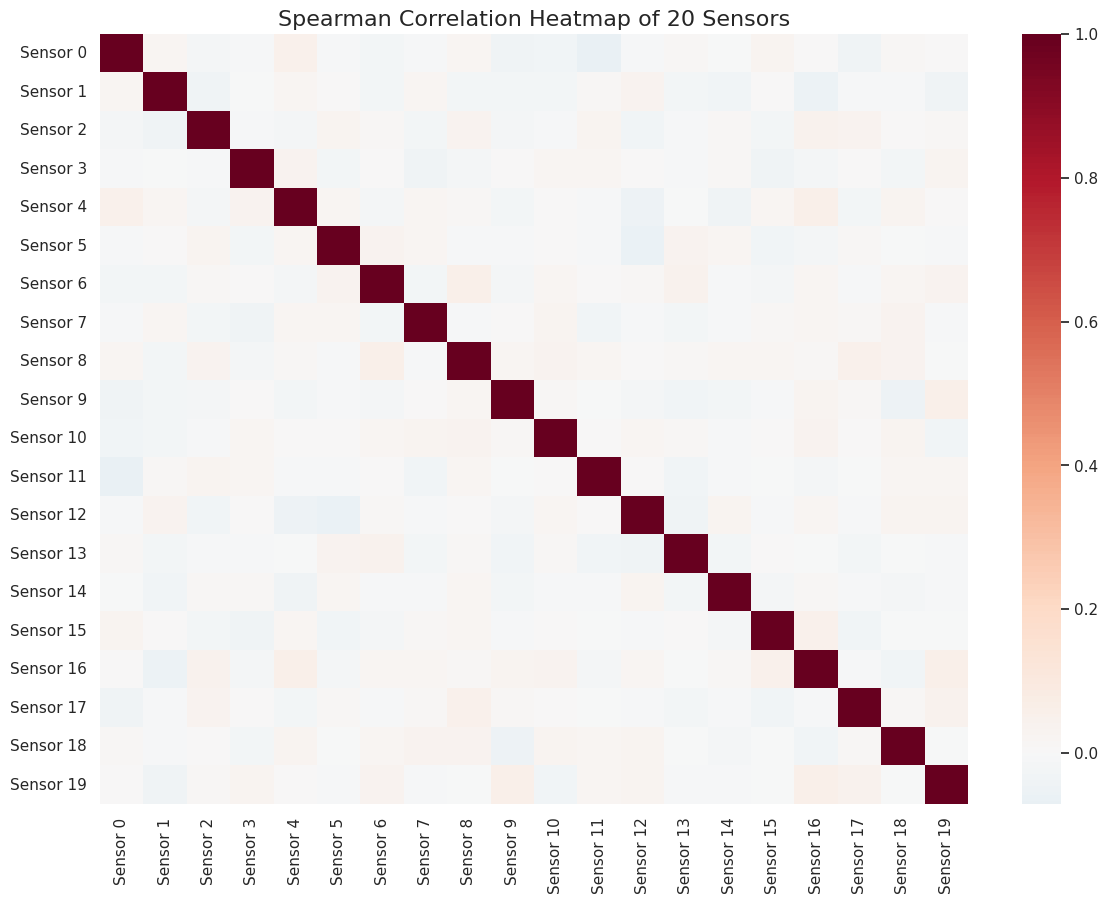

In [13]:

# A. Spearman Correlation Heatmap
# To see if sensors are redundant or have strong relationships
plt.figure(figsize=(14, 10))
corr = df[sensor_cols].corr(method="spearman")
sns.heatmap(corr, annot=False, cmap='RdBu_r', center=0)
plt.title('Spearman Correlation Heatmap of 20 Sensors', fontsize=16)
plt.savefig('eda_sp_correlation_heatmap.png')

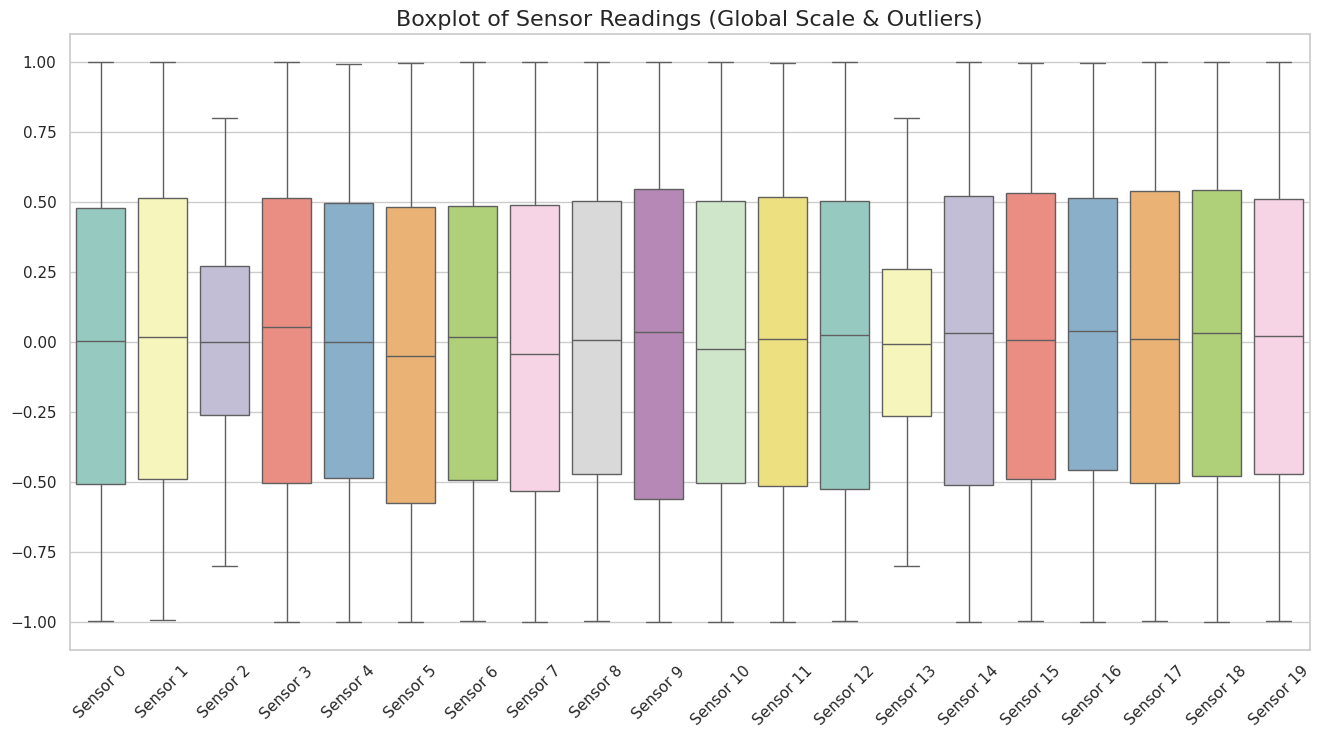

In [14]:
# B. Boxplots for Feature Scale and Outliers
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[sensor_cols], palette='Set3')
plt.xticks(rotation=45)
plt.title('Boxplot of Sensor Readings (Global Scale & Outliers)', fontsize=16)
plt.savefig('eda_boxplots.png')

/tmp/ipython-input-2197335952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


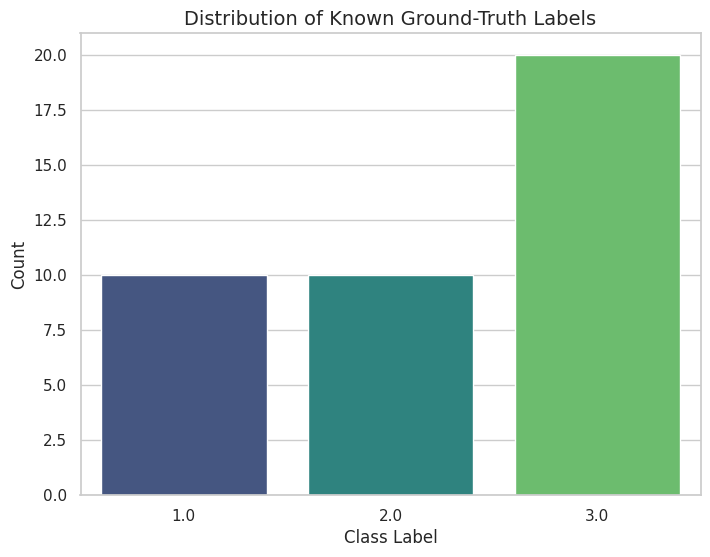

In [15]:
# C. Label Distribution
# Important to see how many samples we actually have for semi-supervised training
plt.figure(figsize=(8, 6))
label_counts = df['Label'].value_counts(dropna=True)
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Known Ground-Truth Labels', fontsize=14)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.savefig('eda_label_distribution.png')

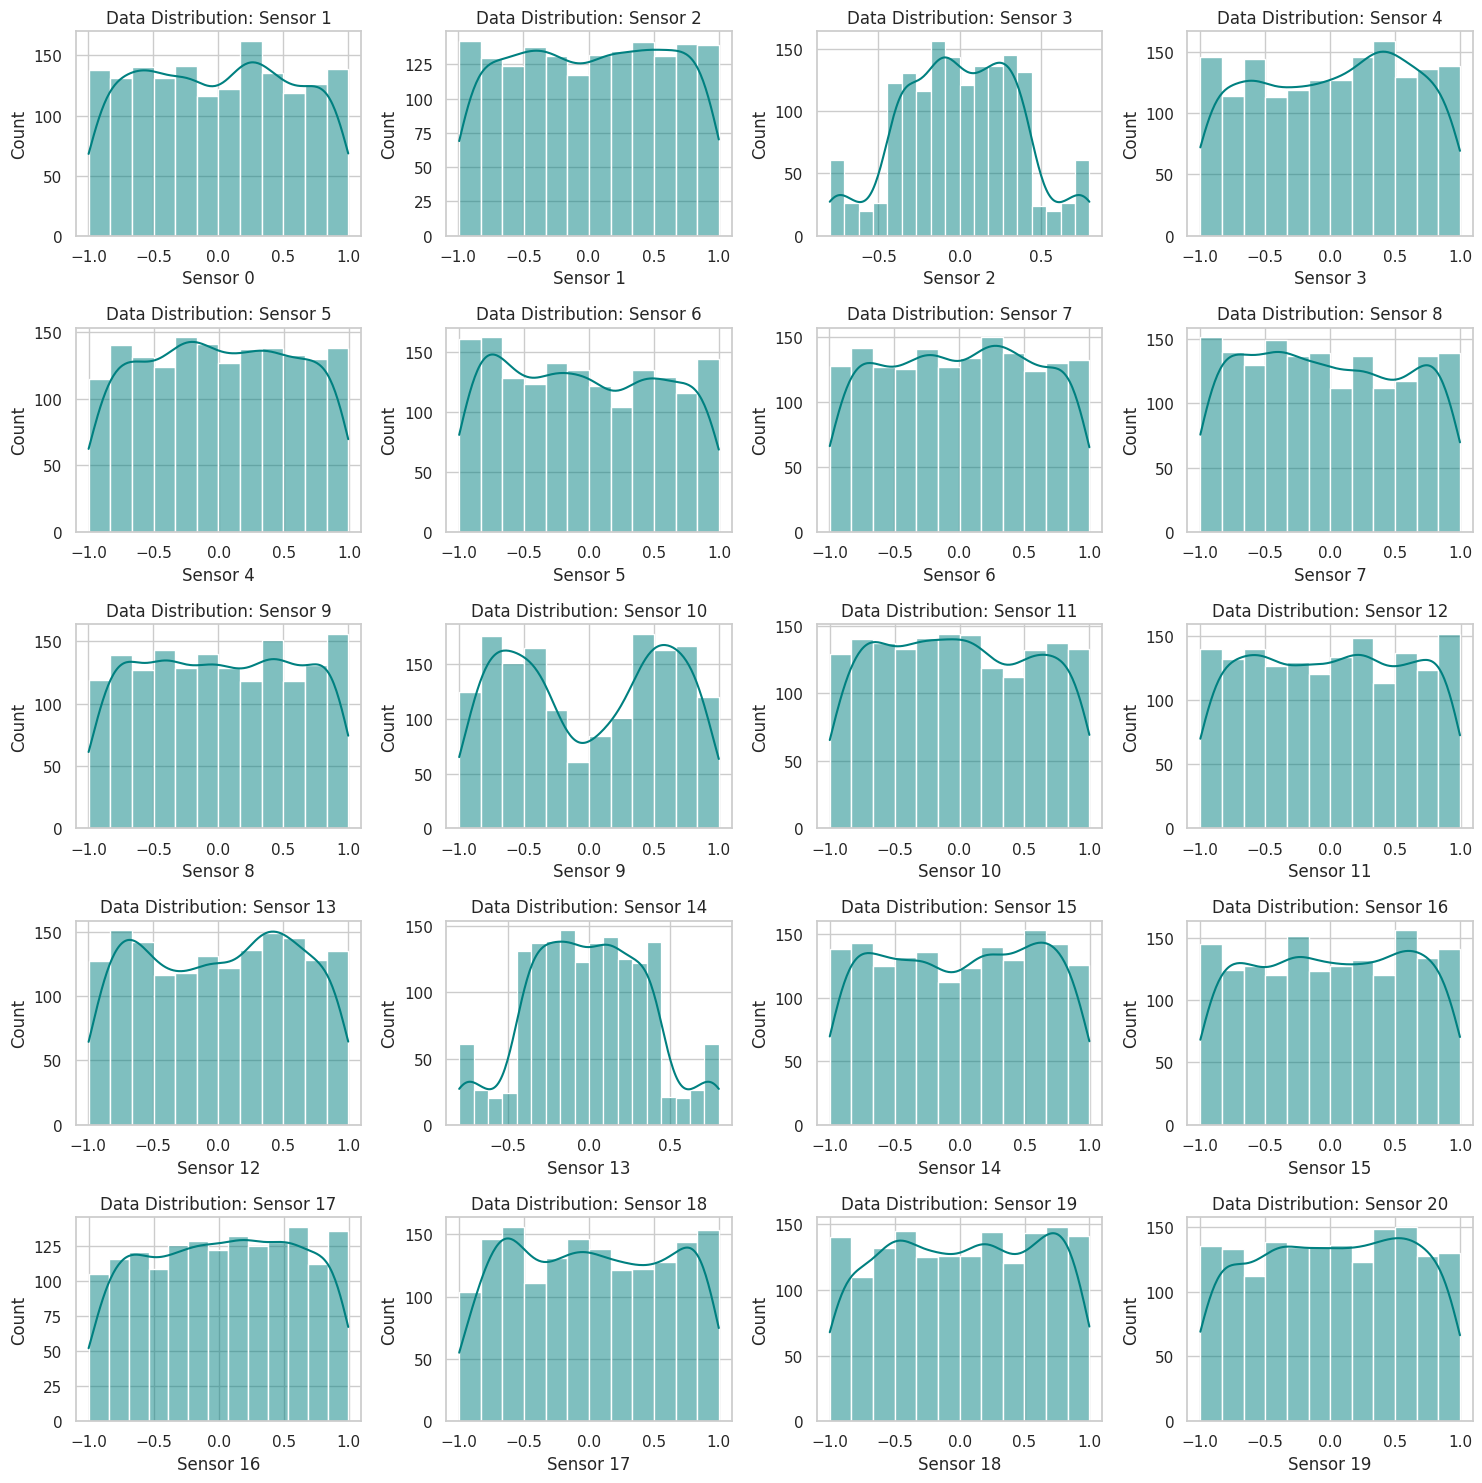

In [22]:
# D. Feature Distributions (Sample of first 4 sensors)
plt.figure(figsize=(15, 15))
for i in range(1, len(df.columns)):
    plt.subplot(5, 4, i)
    sns.histplot(df[f'Sensor {i-1}'], kde=True, color='teal')
    plt.title(f'Data Distribution: Sensor {i}')
plt.tight_layout()
plt.savefig('eda_sensor_distributions.png')